In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/metagem

/content/gdrive/MyDrive/metagem


In [3]:
from Utils.utils import Utils

In [4]:
from AEME import AEME

In [5]:
if __name__ == "__main__":
  utils = Utils()
  tens_1 = utils.get_embeddingtensor('/content/gdrive/MyDrive/metagem/Data/Wordnet-18/hope_emb.csv')
  tens_2 = utils.get_embeddingtensor('/content/gdrive/MyDrive/metagem/Data/Wordnet-18/sdne_emb.csv')


In [6]:
tens_1 = tens_1.float()
tens_2 = tens_2.float()

In [7]:
vocab = utils.read_data('/content/gdrive/MyDrive/metagem/Data/Wordnet-18/sg_wn18_nodes.edgelist')
len(vocab)
vocab
for i in range(len(vocab)):
  vocab[i] = vocab[i].strip()

In [9]:
emb = {}
model = ["CAE"]
for md in model:
  ae = AEME(mode = md, input_dim = 16, latent_dim = 16)
  if md == "DAE":
    model_checkpoint = "/content/gdrive/MyDrive/metagem/Results/CAE/_epoch_500_loss_0.39228.pt"
    tensor_dataset = ae.prepare_input(vocab, tens_1, tens_2)
    emb[md] = ae.predict(tensor_dataset, model_checkpoint)
  else:
    model_checkpoint = "/content/gdrive/MyDrive/metagem/Results/WN18/" + md +"_epoch_498_loss_0.41460.pt"
    tensor_dataset = ae.prepare_input(vocab, tens_1, tens_2)
    emb[md] = ae.predict(tensor_dataset, model_checkpoint)

CPU on


In [10]:
item = list(emb["CAE"].items())
l = len(item)

In [11]:
import numpy as np
X = np.zeros((l, 32))
for i in range(len(X)):
  X[i : ] = item[i][1]

In [12]:
X.shape

(521, 32)

In [13]:
import networkx as nx
G = utils.loadGraphFromEdgeListTxt("/content/gdrive/MyDrive/metagem/Data/Wordnet-18/sg_wn18processed.edgelist")
G = G.to_directed()

from Utils import graphreconstruct as gr
node_num = len(G.nodes)
estimated_adj = gr.get_reconstructed_adj(X, node_num)

In [14]:
estimated_edgelist = gr.get_edge_list_from_adj_mtrx(estimated_adj, threshold=0.2)

In [15]:
len(estimated_edgelist)

270920

In [16]:
from Utils import metrics
MAP = metrics.computeMAP(estimated_edgelist, G, is_undirected=False)
prec_curv, _ = metrics.computePrecisionCurve(estimated_edgelist, G)
print(("\tMAP: {} \t preccision curve: {}\n\n\n\n"+'-'*100).format(MAP, prec_curv[:5]))

	MAP: 1.0 	 preccision curve: [1.0, 1.0, 1.0, 1.0, 1.0]



----------------------------------------------------------------------------------------------------


In [17]:
prec_curv

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

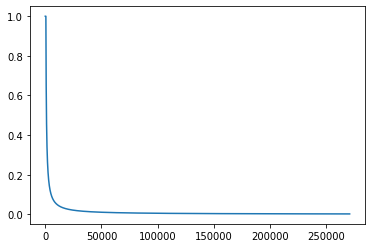

In [19]:
import matplotlib.pyplot as plt
x = np.arange(1, len(prec_curv) + 1)
plt.plot(x, prec_curv)
plt.show()